In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw08.ipynb")

# Homework 8: Confidence Intervals

**Reading**: 
* [Estimation](https://www.inferentialthinking.com/chapters/13/estimation.html)

Please complete this notebook by filling in the cells provided.  

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)


## 1. Thai Restaurants


Ben and Frank are trying see what the best Thai restaurant in Berkeley is. They survey 1500 UC Berkeley students selected uniformly at random, and ask each student what Thai restaurant is the best (*Note: this data is fabricated for the purposes of this homework*). The choices of Thai restaurant are Lucky House, Imm Thai, Thai Temple, and Thai Basil. After compiling the results, Ben and Frank release the following percentages from their sample:

|Thai Restaurant  | Percentage|
|:------------:|:------------:|
|Lucky House | 8% |
|Imm Thai | 52% |
|Thai Temple | 25% |
|Thai Basil | 15% |

These percentages represent a uniform random sample of the population of UC Berkeley students. We will attempt to estimate the corresponding *parameters*, or the percentage of the votes that each restaurant will receive from the entire population (the entire population is all UC Berkeley students). We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimates.

The table `votes` contains the results of the survey.

In [3]:
# Just run this cell
votes = Table.read_table('votes.csv').sample(with_replacement = False)
votes

Vote
Imm Thai
Thai Temple
Imm Thai
Lucky House
Thai Temple
Thai Temple
Imm Thai
Thai Temple
Thai Basil
Thai Basil


**Question 1.** Complete the function `one_resampled_percentage` below. It should return Imm Thai's **percentage** of votes after simulating one bootstrap sample of `tbl`.

**Note:** `tbl` will always be in the same format as `votes`.

<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [4]:
def one_resampled_percentage(tbl):
    sample = tbl.sample() 
    num_votes = votes.num_rows
    percentage = (np.count_nonzero(sample.where('Vote', are.equal_to('Imm Thai')).column('Vote')) / num_votes) * 100 
    return percentage 
    
one_resampled_percentage(votes)

51.6

In [5]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 2.** Complete the `percentages_in_resamples` function such that it returns an array of 2500 bootstrapped estimates of the percentage of voters who will vote for Imm Thai. You should use the `one_resampled_percentage` function you wrote above.

*Note:* There are no public tests for this question, the autograder cell below will return 0.0% passed. 

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [6]:
def percentages_in_resamples():
    percentage_imm = make_array()
    for i in np.arange(2500): 
        sample = one_resampled_percentage(votes) 
        percentage_imm = np.append(percentage_imm, sample)
    return percentage_imm

In [7]:
grader.check("q1_2")

q1_2 results: All test cases passed!

In the following cell, we run the function you just defined, `percentages_in_resamples`, and create a histogram of the calculated statistic for the 2,500 bootstrap estimates of the percentage of voters who voted for Imm Thai. Based on what the original Thai restaurant percentages were, does the graph seem reasonable? Talk to a friend or ask a TA if you are unsure!

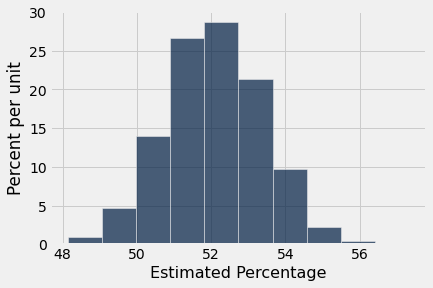

In [10]:
resampled_percentages = percentages_in_resamples()
Table().with_column('Estimated Percentage', resampled_percentages).hist("Estimated Percentage")

**Question 3.** Using the array `resampled_percentages`, find the values at the two edges of the middle 95% of the bootstrapped percentage estimates. (Compute the lower and upper ends of the interval, named `imm_lower_bound` and `imm_upper_bound`, respectively.)

<!--
BEGIN QUESTION
name: q1_3
manual: false
-->

In [11]:
imm_lower_bound = percentile(2.5, resampled_percentages)
imm_upper_bound = percentile(97.5, resampled_percentages)
print("Bootstrapped 95% confidence interval for the percentage of Imm Thai voters in the population: [{:f}, {:f}]".format(imm_lower_bound, imm_upper_bound))

Bootstrapped 95% confidence interval for the percentage of Imm Thai voters in the population: [49.600000, 54.533333]


In [12]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 4.** The survey results seem to indicate that Imm Thai is beating all the other Thai restaurants combined among voters. We would like to use confidence intervals to determine a range of likely values for Imm Thai's true lead over all the other restaurants combined. The calculation for Imm Thai's lead over Lucky House, Thai Temple, and Thai Basil combined is:

$$\text{Imm Thai's % of the vote} - \text{(Lucky House's % of the vote + Thai Temple's % of the vote + Thai Basil's % of the vote)}$$

Define the function `one_resampled_difference` that returns **exactly one value** of Imm Thai's percentage lead over Lucky House, Thai Temple, and Thai Basil combined from one bootstrap sample of `tbl`.

<!--
BEGIN QUESTION
name: q1_4
manual: false
-->

In [13]:
def one_resampled_difference(tbl):
    bootstrap = tbl.sample()
    imm_percentage = np.count_nonzero(bootstrap.where('Vote', 'Imm Thai').column('Vote')) / bootstrap.num_rows 
    lh_percentage = np.count_nonzero(bootstrap.where('Vote', 'Lucky House').column('Vote')) / bootstrap.num_rows
    tt_percentage = np.count_nonzero(bootstrap.where('Vote', 'Thai Temple').column('Vote')) / bootstrap.num_rows
    tb_percentage = np.count_nonzero(bootstrap.where('Vote', 'Thai Basil').column('Vote')) / bootstrap.num_rows 
    return imm_percentage - (lh_percentage + tt_percentage + tb_percentage)

In [14]:
grader.check("q1_4")

q1_4 results: All test cases passed!

In [15]:
# HIDEEN TEST
np.random.seed(123)
-6 <= float(one_resampled_difference(votes)) <= 15

True

<!-- BEGIN QUESTION -->

**Question 5.**
Write a function called `leads_in_resamples` that finds 2,500 bootstrapped estimates (the result of calling `one_resampled_difference`) of Imm Thai's lead over Lucky House, Thai Temple, and Thai Basil combined. Plot a histogram of the resulting samples. 

**Note:** Imm Thai's lead can be negative.

<!--
BEGIN QUESTION
name: q1_5
manual: true
-->

/opt/conda/lib/python3.7/site-packages/datascience/tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


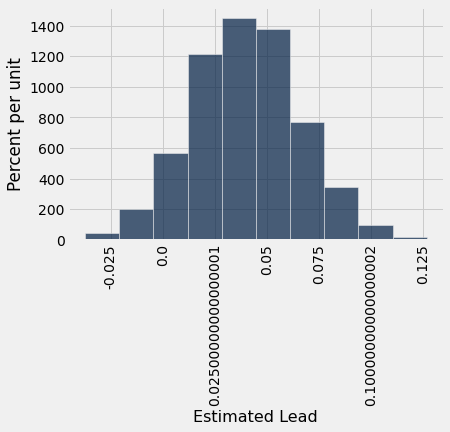

In [16]:
def leads_in_resamples():
    leads = make_array() 
    for i in np.arange(2500): 
        bootstrap = votes.sample() 
        imm_percentage = np.count_nonzero(bootstrap.where('Vote', 'Imm Thai').column('Vote')) / bootstrap.num_rows 
        lh_percentage = np.count_nonzero(bootstrap.where('Vote', 'Lucky House').column('Vote')) / bootstrap.num_rows 
        tt_percentage = np.count_nonzero(bootstrap.where('Vote', 'Thai Temple').column('Vote')) / bootstrap.num_rows 
        tb_percentage = np.count_nonzero(bootstrap.where('Vote', 'Thai Basil').column('Vote')) / bootstrap.num_rows 
        diffs = imm_percentage - (lh_percentage + tt_percentage + tb_percentage) 
        leads = np.append(leads, diffs) 
    return leads

sampled_leads = leads_in_resamples()
Table().with_column('Estimated Lead', sampled_leads).hist("Estimated Lead")

<!-- END QUESTION -->

**Question 6.** Use the simulated data from Question 5 to compute an approximate 95% confidence interval for Imm Thai's true lead over Lucky House, Thai Temple, and Thai Basil combined.

<!--
BEGIN QUESTION
name: q1_6
manual: false
-->

In [17]:
diff_lower_bound = percentile(2.5, sampled_leads)
diff_upper_bound = percentile(97.5, sampled_leads)
print("Bootstrapped 95% confidence interval for Imm Thai's true lead over Lucky House, Thai Temple, and Thai Basil combined: [{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for Imm Thai's true lead over Lucky House, Thai Temple, and Thai Basil combined: [-0.009333, 0.092000]


In [18]:
grader.check("q1_6")

q1_6 results: All test cases passed!

## 2. Interpreting Confidence Intervals


The staff computed the following 95% confidence interval for the percentage of Imm Thai voters: 

$$[49.40, 54.47]$$

(Your answer may have been a bit different; that doesn't mean it was wrong!)

<!-- BEGIN QUESTION -->

#### Question 1
Can we say there is a 95% probability that the interval [49.40, 54.47] contains the true percentage of the population that votes for Imm Thai as the best Berkeley Thai restaurant? Answer "yes" or "no" and explain your reasoning. 

*Note:* ambiguous answers using language like "sometimes" or "maybe" will not receive credit.

<!--
BEGIN QUESTION
name: q2_1
manual: true
-->

No, as the Imm Thai voters are not representative of the UC Berkeley student population.


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2**

The staff also created 70%, 90%, and 99% confidence intervals from the same sample, but we forgot to label which confidence interval represented which percentages! Match each confidence level (70%, 90%, 99%) with its corresponding interval in the cell below (e.g. __ % CI: [49.87, 54.0] $\rightarrow$ replace the blank with one of the three confidence levels). **Then**, explain your thought process and how you came up with your answers.

The intervals are below:

* [49.87, 54.00]
* [50.67, 53.27]
* [48.80, 55.40]

<!--
BEGIN QUESTION
name: q2_2
manual: true
-->

*The* wider the interval, the higher the confidence level. 
[49.87, 54.00] ==> 90%
[50.67, 53.27] ==> 70%
[48.80, 55.40] ==> 99%


<!-- END QUESTION -->

#### Question 3
Suppose we produced 5,000 new samples (each one a uniform random sample of 1,500 voters/students) from the population and created a 95% confidence interval from each one. Roughly how many of those 5,000 intervals do you expect will actually contain the true percentage of the population?

Assign your answer to `true_percentage_intervals`.

<!--
BEGIN QUESTION
name: q2_3
manual: false
-->

In [19]:
true_percentage_intervals = .95*5000

In [20]:
grader.check("q2_3")

q2_3 results: All test cases passed!

Recall the second bootstrap confidence interval you created, which estimated Imm Thai's lead over Lucky House, Thai Temple, and Thai Basil combined. Among
voters in the sample, Imm Thai's lead was 4%. The staff's 95% confidence interval for the true lead (in the population of all voters) was

$$[-0.80, 8.80]$$

Suppose we are interested in testing a simple yes-or-no question:

> "Is the percentage of votes for Imm Thai tied with the percentage of votes for Lucky House, Thai Temple, and Thai Basil combined?"

Our null hypothesis is that the percentages are equal, or equivalently, that Imm Thai's lead is exactly 0. Our alternative hypothesis is that Imm Thai's lead is not equal to 0.  In the questions below, don't compute any confidence interval yourself - use only the staff's 95% confidence interval.


**Question 4** 

Say we use a 5% P-value cutoff.  Do we reject the null, fail to reject the null, or are we unable to tell using our staff confidence interval?

Assign `restaurants_tied` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using our staff confidence interval

*Hint:* If you're confused, take a look at [this chapter](https://www.inferentialthinking.com/chapters/13/4/using-confidence-intervals.html) of the textbook.

<!--
BEGIN QUESTION
name: q2_4
manual: false
-->

In [21]:
restaurants_tied = 2

In [22]:
grader.check("q2_4")

q2_4 results: All test cases passed!

#### Question 5
What if, instead, we use a P-value cutoff of 1%? Do we reject the null, fail to reject the null, or are we unable to tell using our staff confidence interval?

Assign `cutoff_one_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using our staff confidence interval

<!--
BEGIN QUESTION
name: q2_5
manual: false
-->

In [23]:
cutoff_one_percent = 3

In [24]:
grader.check("q2_5")

q2_5 results: All test cases passed!

#### Question 6
What if we use a P-value cutoff of 10%? Do we reject, fail to reject, or are we unable to tell using our confidence interval?

Assign `cutoff_ten_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using our staff confidence interval

<!--
BEGIN QUESTION
name: q2_6
manual: false
-->

In [25]:
cutoff_ten_percent = 2

In [26]:
grader.check("q2_6")

q2_6 results: All test cases passed!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [27]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q1_6 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q2_6 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export()